# Einleitung

Dieses kleine Jupyter-Notebook soll zeigen, wie man ein kleines Neuronales Netz - ein sog. "Perzeptron" - selber in Python programmieren, trainieren und anwenden kann.

# Einlesen eines Datensatzes

In [1]:
import tensorflow as tf

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [10]:
type(x_train)

numpy.ndarray

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

# Visualisieren einiger Bilder

In [34]:
bild = x_train[0, :, :]

In [35]:
type(bild)

numpy.ndarray

In [36]:
bild.shape

(28, 28)

In [37]:
bild

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [38]:
from matplotlib import pyplot as plt

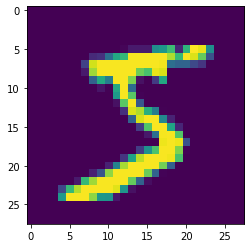

In [39]:
plt.imshow(bild)

In [46]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Vorbereitung der Implementierung

## Erzeugen der Targets

In [61]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [179]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(labels):
    enc = OneHotEncoder()
    enc.fit(labels.reshape(-1,1))
    one_hot_kodierung = enc.transform(labels.reshape(-1,1)).toarray()
    return one_hot_kodierung

In [180]:
one_hot_kodierung = one_hot(y_train)

In [181]:
one_hot_kodierung

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Bilder sind 2D Inputs, KNN erwartet 1D Input

In [75]:
bild.shape

(28, 28)

In [76]:
28*28

784

In [77]:
v = bild.reshape(-1)

In [78]:
v

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [79]:
v.shape

(784,)

In [80]:
type(v)

numpy.ndarray

In [81]:
v.ndim

1

In [82]:
bild.ndim

2

In [84]:
import numpy as np
v_mit_bias_input = np.append(v, [1])

In [86]:
v_mit_bias_input.shape

(785,)

In [87]:
v_mit_bias_input

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## Erzeugen einer Gewichtsmatrix

In [88]:
nr_inputs = 28**2 + 1

In [89]:
nr_inputs

785

In [90]:
nr_outputs = 10

In [91]:
W = np.zeros( (nr_inputs, nr_outputs) )

In [92]:
W.shape

(785, 10)

In [93]:
W

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [138]:
low = -0.1
high = +0.1
W = np.random.uniform( low, high, (nr_inputs, nr_outputs) )

In [139]:
W.shape

(785, 10)

In [140]:
W

array([[-0.063046  , -0.01918907, -0.00065578, ...,  0.02471633,
         0.03761063,  0.07923854],
       [ 0.04342232,  0.08319557,  0.03781796, ..., -0.07532538,
        -0.0318611 ,  0.06158202],
       [ 0.0152744 , -0.09924836, -0.02737803, ..., -0.08494512,
         0.01841296,  0.05293543],
       ...,
       [ 0.08792713, -0.06974535,  0.00108843, ..., -0.06337019,
         0.07549563, -0.03466135],
       [ 0.05983364, -0.00899968,  0.02222775, ..., -0.05513058,
        -0.0737676 ,  0.04640912],
       [ 0.0435556 , -0.09040748,  0.0179689 , ..., -0.00655396,
        -0.03540274, -0.06428089]])

## Berechnung des Aktivierungsvektors

In [141]:
v_mit_bias_input.shape

(785,)

In [142]:
inp_matrix = v_mit_bias_input.reshape(1,785)

In [143]:
inp_matrix.ndim

2

In [144]:
inp_matrix.shape

(1, 785)

In [145]:
W.shape

(785, 10)

In [146]:
act = np.matmul(inp_matrix, W)

In [147]:
act.shape

(1, 10)

In [148]:
act

array([[  99.38467565,  161.13276878,   87.57673254, -101.89595342,
         -63.96631246,  -11.39426315, -212.65989456, -127.96248764,
          92.50820575,  317.91647749]])

## Berechnung des Outputvektors

In [149]:
def RELU(x):
    if x < 0:
        return 0
    else:
        return x

In [150]:
RELU(-0.5)

0

In [151]:
RELU(2.4)

2.4

In [152]:
type(act)

numpy.ndarray

In [153]:
act.shape

(1, 10)

In [154]:
RELU(act)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [155]:
RELU_vecfunc = np.vectorize(RELU, otypes=[float] )

In [156]:
out = RELU_vecfunc(act)

In [157]:
out

array([[ 99.38467565, 161.13276878,  87.57673254,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         92.50820575, 317.91647749]])

In [158]:
act

array([[  99.38467565,  161.13276878,   87.57673254, -101.89595342,
         -63.96631246,  -11.39426315, -212.65989456, -127.96248764,
          92.50820575,  317.91647749]])

## Berechnung des Fehlervektors

In [159]:
out

array([[ 99.38467565, 161.13276878,  87.57673254,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         92.50820575, 317.91647749]])

In [160]:
out.shape

(1, 10)

In [161]:
out1D = out.reshape(-1)

In [162]:
out1D

array([ 99.38467565, 161.13276878,  87.57673254,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        92.50820575, 317.91647749])

In [163]:
out1D.shape

(10,)

In [164]:
target_vector = one_hot_kodierung[0,:]

In [165]:
target_vector.shape

(10,)

In [166]:
target_vector

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [167]:
error_vector = target_vector - out1D

In [169]:
error_vector

array([ -99.38467565, -161.13276878,  -87.57673254,    0.        ,
          0.        ,    1.        ,    0.        ,    0.        ,
        -92.50820575, -317.91647749])

## Berechnung aller Gewichtsänderungen

In [170]:
nr_outputs

10

In [171]:
nr_inputs

785

In [173]:
v_mit_bias_input.shape

(785,)

In [177]:
alpha = 0.001

for out_neuron_nr in range(0,nr_outputs):
    for inp_nr in range(0,nr_inputs):
        weight = W[inp_nr, out_neuron_nr]
        
        # Compute weight change for the current weight
        # based on the Perceptron Learning Rule
        delta_weight = v_mit_bias_input[inp_nr] * error_vector[out_neuron_nr] * alpha
        
        # Learning happens here!
        W[inp_nr, out_neuron_nr] += delta_weight        

# Einzelteile zusammensetzen zu einem Programm

In [188]:
import tensorflow as tf
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder


def one_hot(labels):
    enc = OneHotEncoder()
    enc.fit(labels.reshape(-1,1))
    one_hot_kodierung = enc.transform(labels.reshape(-1,1)).toarray()
    return one_hot_kodierung


def act_func_relu_scalar(x):
    if x < 0:
        return 0
    else:
        return x
    
act_func_relu_vector = np.vectorize(act_func_relu_scalar, otypes=[float] )


def prepare_data():
    
    # 1. load MNIST data
    mnist_dataset = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
    
    # 2. map image pixel values from [0,255] to [0,1]
    x_train = x_train.astype(float)
    x_test  = x_test.astype(float)
    
    x_train = x_train * (1.0/255.0)
    x_test  = x_test  * (1.0/255.0)
    
    # 3. map train data target labels to one-hot encoded vectors
    y_train_onehot = one_hot(y_train)
    
    # 4. map test data target labels to one-hot encoded vectors
    y_test_onehot = one_hot(y_test)
    
    return x_train, y_train_onehot, \
           x_test,  y_test_onehot


def perceptron_predict(image,W):
        
    # 1. transform 2D input image (28x28 pixel) to 1D vector
    v = image.reshape(-1)
    
    # 2. add bias input to input vector v
    v_mit_bias_input = np.append(v, [1])
    
    # 3. compute activations of all <nr_outputs> output neurons
    act = np.matmul(v_mit_bias_input, W)
        
    # 4. compute output vector given activation vector
    out = act_func_relu_vector(act)
    
    return v_mit_bias_input, out
    
    

def preceptron_train(v_with_add_bias_input,y,t,W):
    
    # 1. compute error for each of the output neurons
    error_vector = t - y
    
    # 2. define learning rate
    alpha = 0.001
    
    # 3. for all output neurons ...
    for out_neuron_nr in range(0,nr_outputs):
        
        # for all inputs of that output neuron ...
        for inp_nr in range(0,nr_inputs):
            
            # compute weight change for the current weight
            # based on the Perceptron learning rule
            delta_weight = v_with_add_bias_input[inp_nr] *  \
                           error_vector[out_neuron_nr] *    \
                           alpha

            # Learning happens here!
            W[inp_nr, out_neuron_nr] += delta_weight

            
            
def perceptron_test(x_test, y_test, W):
    
    nr_test_samples = x_test.shape[0]
    
    correct = 0
    for sample_id in range(0,nr_test_samples):

        # get next test sample
        image       = x_test[sample_id]
        teacher_vec = y_test[sample_id]
        
        # compute prediction vector
        _, pred_vec = perceptron_predict(image,W)
        
        # compute predicted label
        pred_label = np.argmax(pred_vec)
        
        # get actual label
        gt_label = np.argmax(teacher_vec)
        
        #print("pred: {0} vs. gt: {1}".format(pred_label, gt_label))
        
        # was the predicted label correct?
        if pred_label == gt_label:
            correct += 1
            
    acc = correct/nr_test_samples
    return acc
   

    
# 1. get training data
x_train, y_train, x_test, y_test = prepare_data()


# 2. prepare a weight matrix for the Perceptron
nr_inputs = 28**2 + 1
nr_outputs = 10
low = -1.0
high = +1.0
W = np.random.uniform( low, high, (nr_inputs, nr_outputs) )


# 3. training
nr_train_samples = x_train.shape[0]
accs = []
HOW_MANY_STEPS_TO_TRAIN = 50000
    
# for each training sample in the training dataset ...
correct = 0    
for train_step_nr in range(0,HOW_MANY_STEPS_TO_TRAIN):

    # get next training sample
    sample_id   = np.random.randint(0,nr_train_samples)
    image       = x_train[sample_id]
    teacher_vec = y_train[sample_id]

    # compute prediction vector
    v_with_add_bias_input, pred_vec = perceptron_predict(image,W)

    # compute predicted label
    pred_label = np.argmax(pred_vec)

    # get actual label
    gt_label = np.argmax(teacher_vec)

    #print("pred: {0} vs. gt: {1}".format(pred_label, gt_label))

    if pred_label == gt_label:
        correct += 1

    # adapt weights due to error
    # and according to Perceptron learning rule?        
    preceptron_train(v_with_add_bias_input,pred_vec,teacher_vec,W)

    if train_step_nr % 100 == 0:
        acc = perceptron_test(x_test, y_test, W)
        print("train step: {0} --> test data set accuracy: {1:.3f}".format(train_step_nr, acc))

        accs.append(acc)

print("\nfinished!")



train step: 0 --> test data set accuracy: 0.076
train step: 100 --> test data set accuracy: 0.088
train step: 200 --> test data set accuracy: 0.087
train step: 300 --> test data set accuracy: 0.093


KeyboardInterrupt: 

# Plotten der Lernkurve

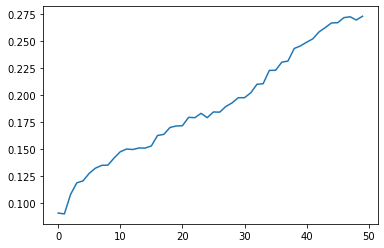

In [186]:
from matplotlib import pyplot as plt
plt.plot(accs)
plt.show()